In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
from io import BytesIO
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [184]:
url = "https://github.com/samoletpanfilov/reinforcement_task/raw/refs/heads/master/data/train.xlsx"  # Ссылка должна содержать raw
response = requests.get(url)
df = pd.read_excel(BytesIO(response.content), engine='openpyxl')
df.head(15)

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
5,2015-02-09,30300
6,2015-02-16,30100
7,2015-02-23,29400
8,2015-03-02,29200
9,2015-03-09,29000


In [185]:
df.shape

(400, 2)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [187]:
df.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


Предобработка данных

In [188]:
df["dt"] = pd.to_datetime(df["dt"])  # Преобразуем дату в формат datetime
df["weeks"] = (df["dt"] - df["dt"].min()).dt.days // 7 # Преобразуем дату в количество недель

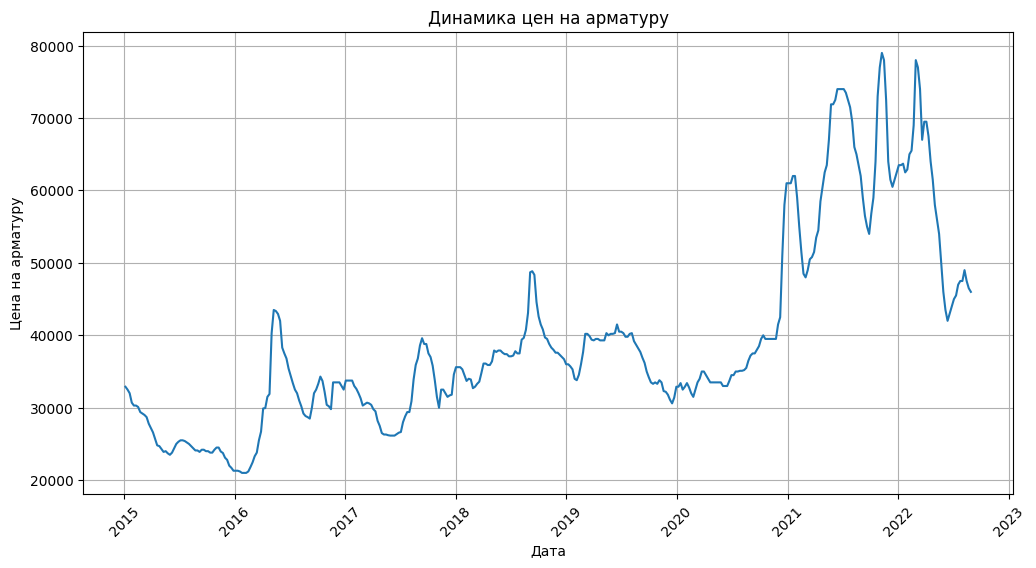

In [189]:
# Строим график
plt.figure(figsize=(12, 6))
plt.plot(df["dt"], df["Цена на арматуру"], marker='', linestyle='-')

# Настроим оси и заголовок
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Динамика цен на арматуру")
plt.grid(True)

# Улучшим читаемость меток дат
plt.xticks(rotation=45)

# Показываем график
plt.show()

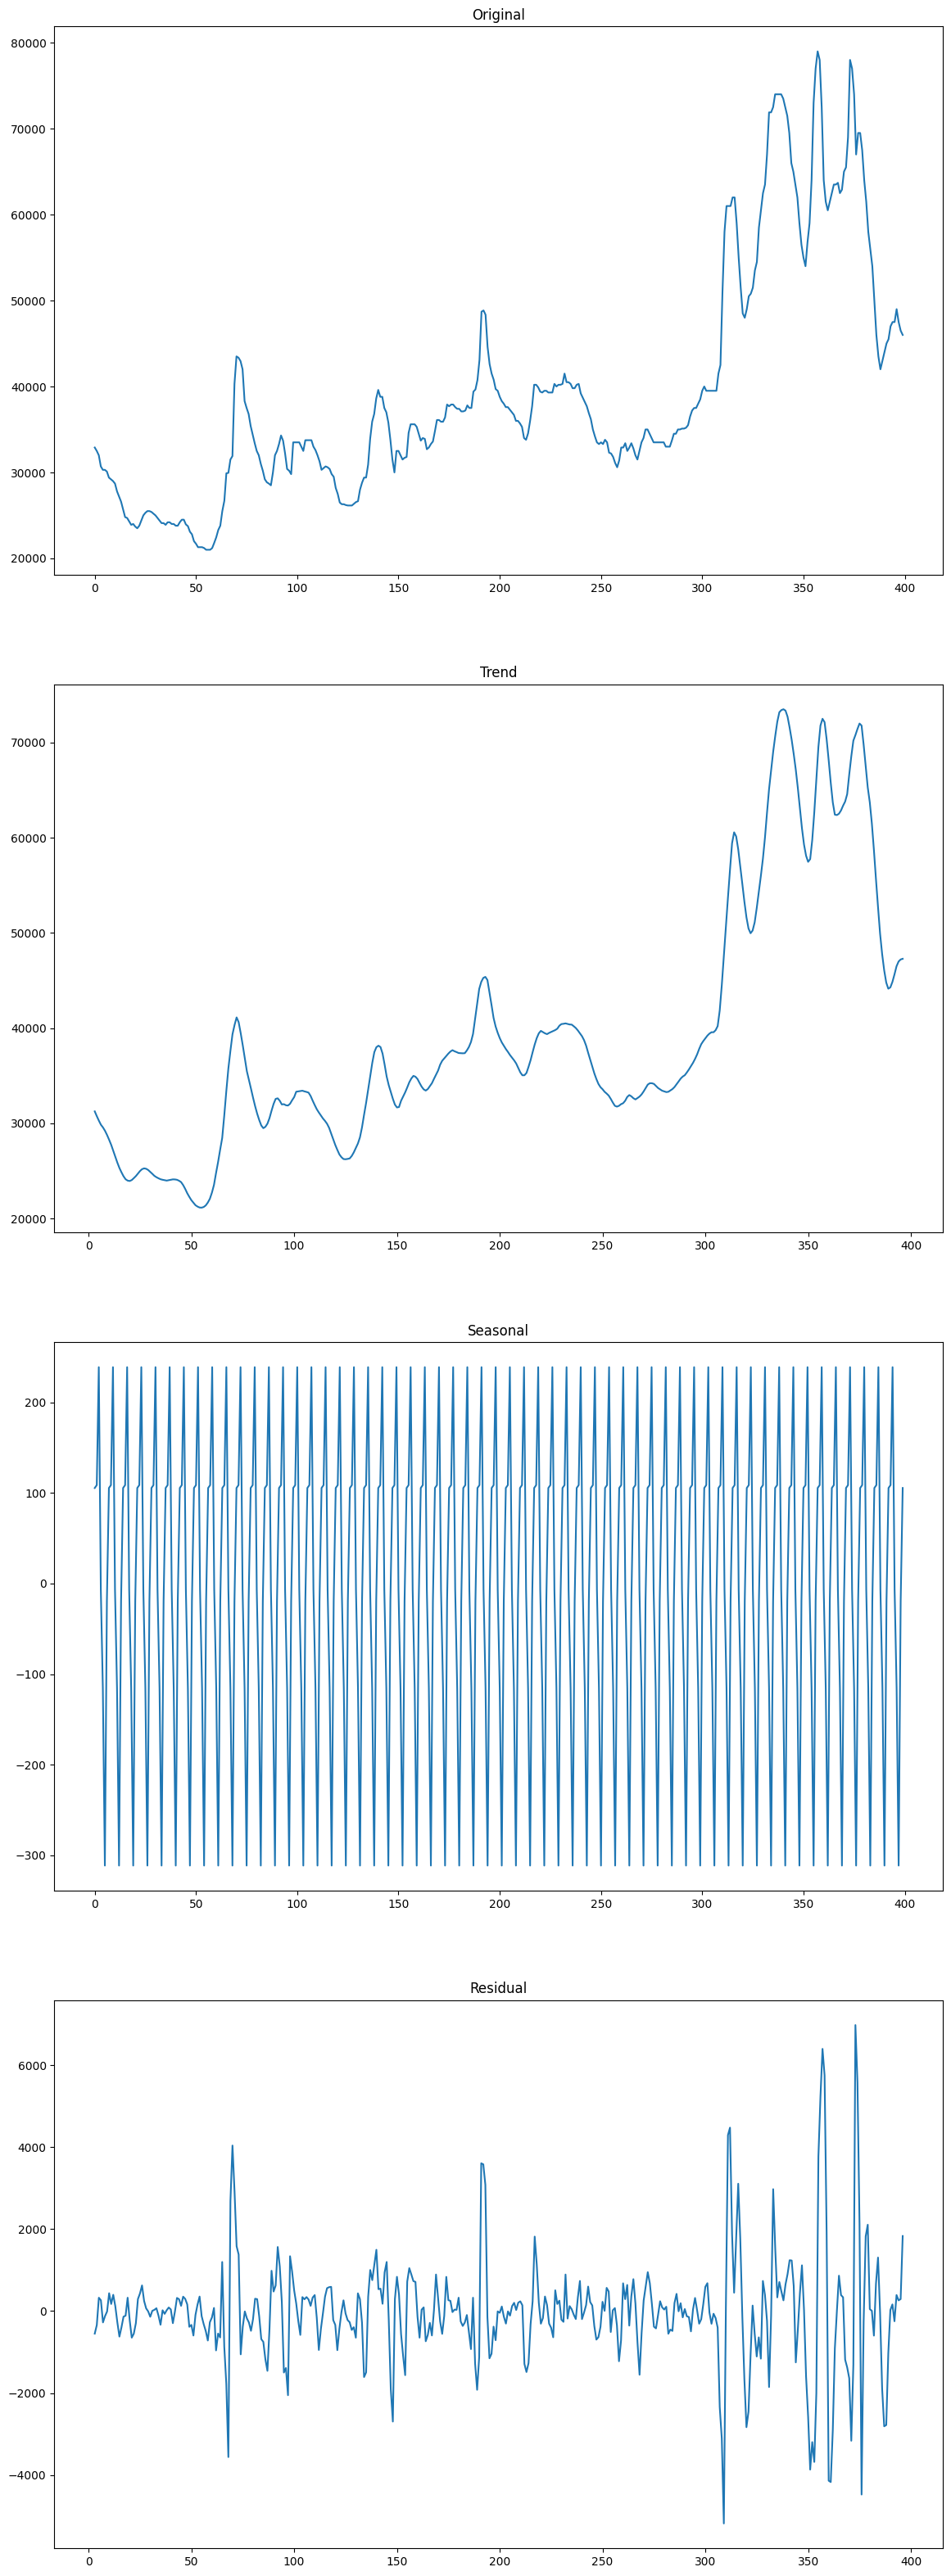

In [190]:
# Разложим ряд на компоненты и проверим ответы на вопросы

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df['Цена на арматуру'],period = 7)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [191]:
# 3. Определение признаков (X) и целевой переменной (y)
X = df[["weeks"]]  # Количество недель с первой даты
y = df["Цена на арматуру"]  # Цены на арматуру

In [192]:
# 4. Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
# 5. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [194]:
# 6. Получение предсказаний
y_pred = model.predict(X_test)

In [195]:
# 7. Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X_test, y_test)

In [196]:
# Вывод метрик
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R²): {r2_score:.4f}")

Средняя абсолютная ошибка (MAE): 6501.97
Среднеквадратичная ошибка (MSE): 71527115.01
Корень среднеквадратичной ошибки (RMSE): 8457.37
Коэффициент детерминации (R²): 0.5500


In [197]:
# 8. Вывод коэффициентов модели
print(f"Коэффициент (наклон линии): {model.coef_[0]:.4f}")
print(f"Свободный член (пересечение с осью Y): {model.intercept_:.2f}")

Коэффициент (наклон линии): 94.2926
Свободный член (пересечение с осью Y): 20433.96


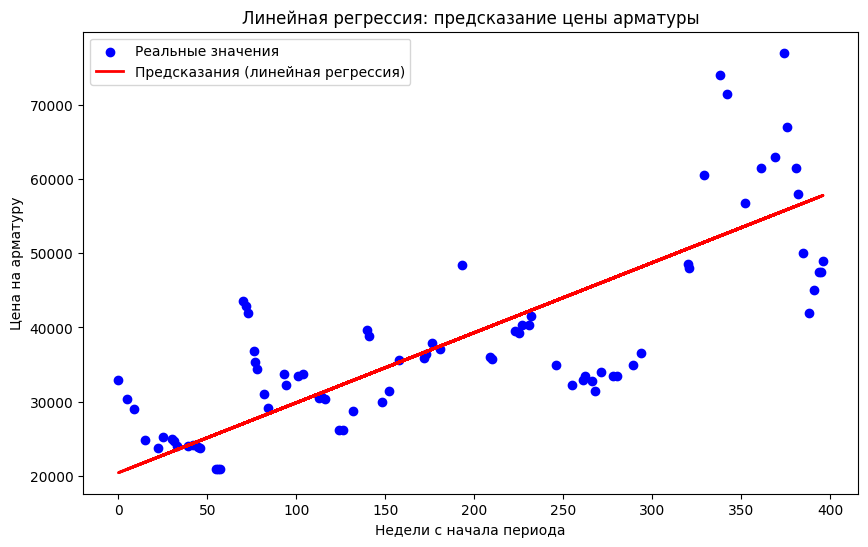

In [198]:
# 9. Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Реальные значения")  # Реальные цены
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Предсказания (линейная регрессия)")  # Линия регрессии
plt.xlabel("Недели с начала периода")
plt.ylabel("Цена на арматуру")
plt.title("Линейная регрессия: предсказание цены арматуры")
plt.legend()
plt.show()